# EDA

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing dataset
telco = pd.read_csv("Data/Telco_Customer_Churn.csv")
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
telco.shape

(7043, 21)

In [4]:
telco.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Lets drop CutomerID as it doesn't add any substantial value in analysis, moreover increases dimensionality.

In [5]:
telco.drop(["customerID"], inplace = True, axis = 1)

In [6]:
def stacked_plot(df, group, target):
    """
    Function to generate a stacked plots between two variables
    """
    fig, ax = plt.subplots(figsize = (6,4))
    temp_df = (df.groupby([group, target]).size()/df.groupby(group)[target].count()).reset_index().pivot(columns=target, index=group, values=0)
    temp_df.plot(kind='bar', stacked=True, ax = ax, color = ["green", "darkred"])
    ax.xaxis.set_tick_params(rotation=0)
    ax.set_xlabel(group)
    ax.set_ylabel('Churn Percentage')

### Gender, Senior Citizen, Partner, Dependents

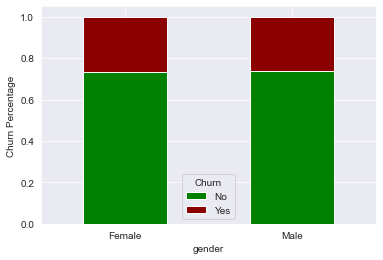

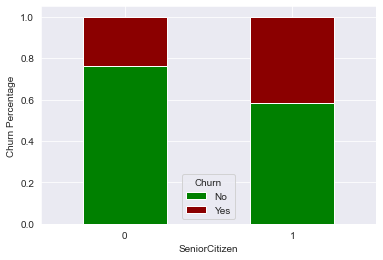

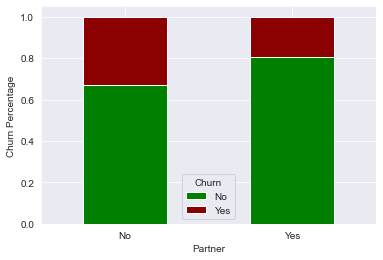

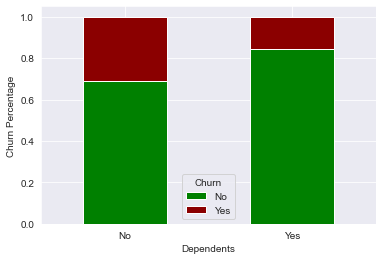

In [7]:
stacked_plot(telco, "gender", "Churn")
stacked_plot(telco, "SeniorCitizen", "Churn")
stacked_plot(telco, "Partner", "Churn")
stacked_plot(telco, "Dependents", "Churn")

Gender distinction alone is not a significant factor for churn.\
Interestingly, younger population are less likely to churn as compared to senior citizens! The reason might be the busy life, more money or another factors.

In [8]:
telco[(telco.SeniorCitizen == 0) & (telco.Partner == 'Yes') & (telco.Dependents == 'Yes')].Churn.value_counts()

No     1437
Yes     229
Name: Churn, dtype: int64

In [9]:
telco[(telco.SeniorCitizen == 0) & (telco.Partner == 'Yes') & (telco.Dependents == 'No')].Churn.value_counts()

No     921
Yes    242
Name: Churn, dtype: int64

In [10]:
telco[(telco.SeniorCitizen == 0) & (telco.Partner == 'No') & (telco.Dependents == 'Yes')].Churn.value_counts()

No     278
Yes     75
Name: Churn, dtype: int64

In [11]:
telco[(telco.SeniorCitizen == 0) & (telco.Partner == 'No') & (telco.Dependents == 'No')].Churn.value_counts()

No     1872
Yes     847
Name: Churn, dtype: int64

### Tenure

In [12]:
telco['tenure'].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [13]:
telco['tenure'].value_counts().head(10)

1     613
72    362
2     238
3     200
4     176
71    170
5     133
7     131
8     123
70    119
Name: tenure, dtype: int64

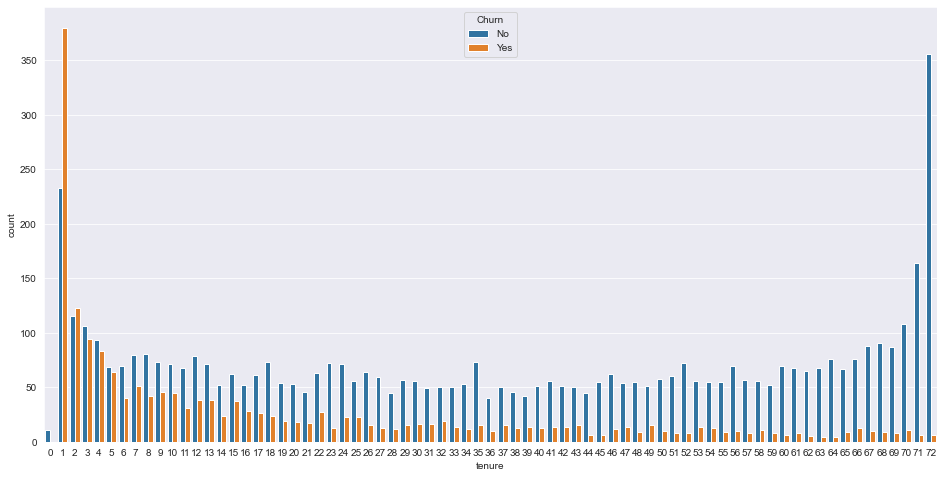

In [14]:
plt.figure(figsize=(16,8))
sns.countplot(x="tenure", hue="Churn", data=telco)
plt.show()

It is evident from the above figure, that a user is less likely to churn with tenure.

In [15]:
# Binning tenure into yearly groups

def tenure(t):
    if t<=12:
        return 1
    elif t>12 and t<=24:
        return 2
    elif t>24 and t<=36:
        return 3
    elif t>36 and t<=48:
        return 4
    elif t>48 and t<=60:
        return 5
    else:
        return 6

telco["tenure_group"] = telco["tenure"].apply(lambda x: tenure(x))

In [16]:
telco["tenure_group"].value_counts()

1    2186
6    1407
2    1024
5     832
3     832
4     762
Name: tenure_group, dtype: int64

<AxesSubplot:xlabel='tenure_group', ylabel='count'>

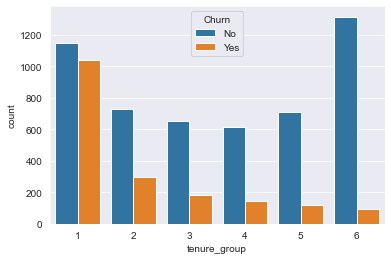

In [17]:
sns.countplot(x="tenure_group", hue="Churn", data=telco)

### Phone Service and MultipleLines

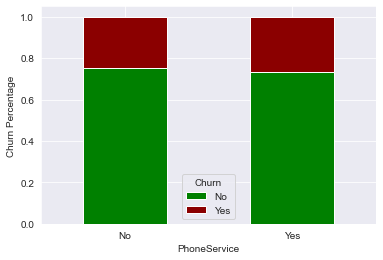

In [18]:
stacked_plot(telco, "PhoneService", "Churn")

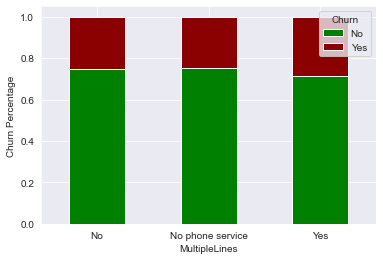

In [19]:
stacked_plot(telco, "MultipleLines", "Churn")

As we can see multiple lines and phonservice do not add value in the model having similar churn rate.

### Online Security, Online Backup, Device Protection, Tech Support, Streaming TV, Streaming Movies

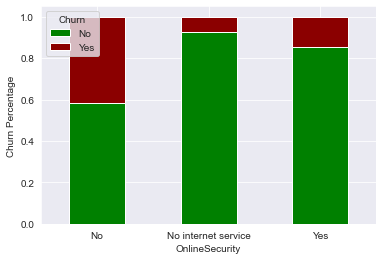

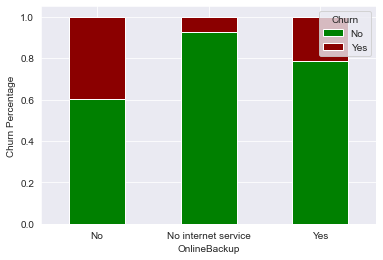

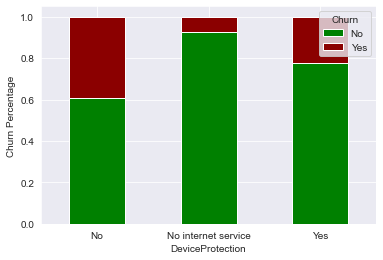

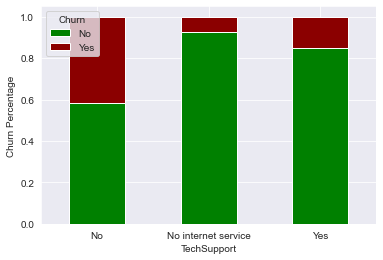

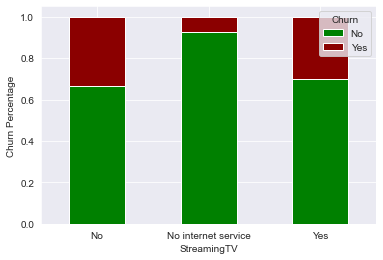

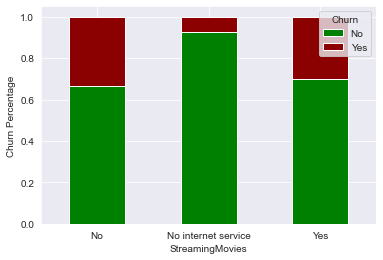

In [20]:
stacked_plot(telco, "OnlineSecurity", "Churn")
stacked_plot(telco, "OnlineBackup", "Churn")
stacked_plot(telco, "DeviceProtection", "Churn")
stacked_plot(telco, "TechSupport", "Churn")
stacked_plot(telco, "StreamingTV", "Churn")
stacked_plot(telco, "StreamingMovies", "Churn")

In all above categories we see consistent results. If a person does not opt for internet service, the customer churning is less. The reason might be the low cost of the service. Additionally, if they have internet service and does not opt for specific service their probability of churning is high.

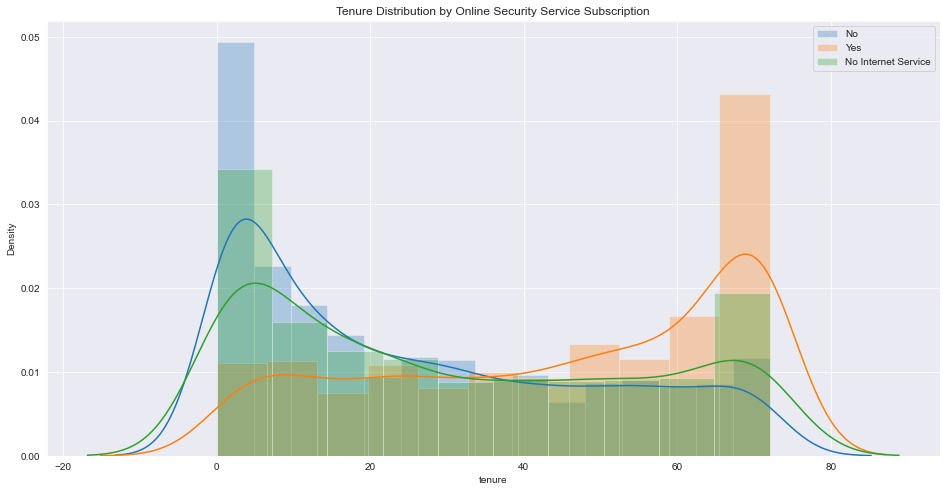

In [21]:
plt.figure(figsize=(16,8))
sns.distplot(telco.tenure[telco.OnlineSecurity == "No"], hist_kws=dict(alpha=0.3), label="No")
sns.distplot(telco.tenure[telco.OnlineSecurity == "Yes"], hist_kws=dict(alpha=0.3), label="Yes")
sns.distplot(telco.tenure[telco.OnlineSecurity == "No internet service"], hist_kws=dict(alpha=0.3), label="No Internet Service")
plt.title("Tenure Distribution by Online Security Service Subscription")
plt.legend()
plt.show()

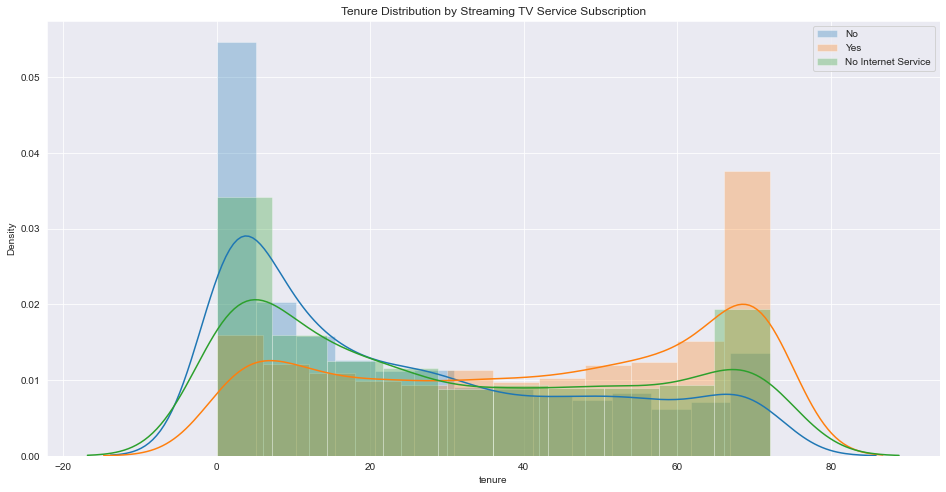

In [22]:
plt.figure(figsize=(16,8))
sns.distplot(telco.tenure[telco.StreamingTV == "No"], hist_kws=dict(alpha=0.3), label="No")
sns.distplot(telco.tenure[telco.StreamingTV == "Yes"], hist_kws=dict(alpha=0.3), label="Yes")
sns.distplot(telco.tenure[telco.StreamingTV == "No internet service"], hist_kws=dict(alpha=0.3), label="No Internet Service")
plt.title("Tenure Distribution by Streaming TV Service Subscription")
plt.legend()
plt.show()

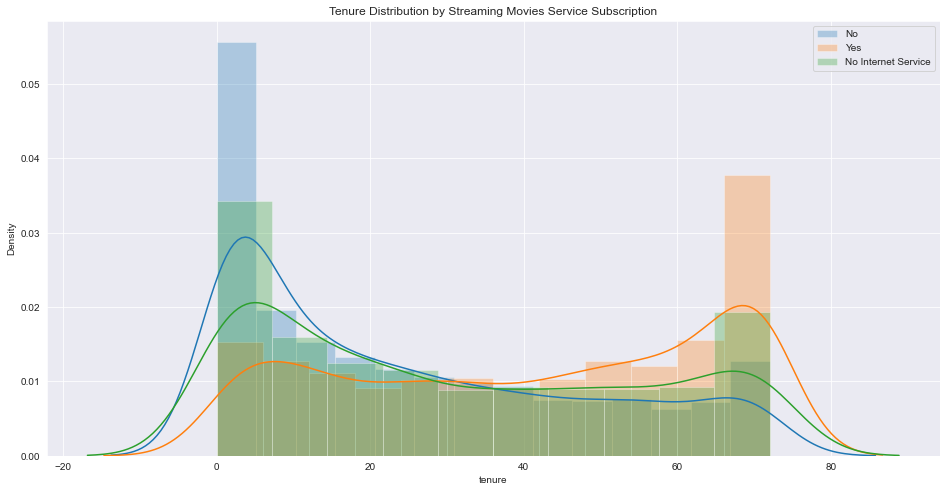

In [23]:
plt.figure(figsize=(16,8))
sns.distplot(telco.tenure[telco.StreamingMovies == "No"], hist_kws=dict(alpha=0.3), label="No")
sns.distplot(telco.tenure[telco.StreamingMovies == "Yes"], hist_kws=dict(alpha=0.3), label="Yes")
sns.distplot(telco.tenure[telco.StreamingMovies == "No internet service"], hist_kws=dict(alpha=0.3), label="No Internet Service")
plt.title("Tenure Distribution by Streaming Movies Service Subscription")
plt.legend()
plt.show()

As we can see, when the customers are new they do not opt for various services and their churning rate is very high.

### Internet Service

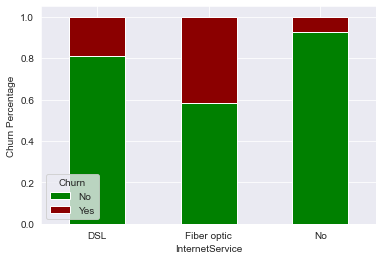

In [24]:
stacked_plot(telco, "InternetService", "Churn")

When the internet service is Fiber Optic, the churn rate is very high. Fiber Optic provides higher speed compared to DSL. The reason might be the higher cost of fiber optic.

<AxesSubplot:xlabel='InternetService', ylabel='count'>

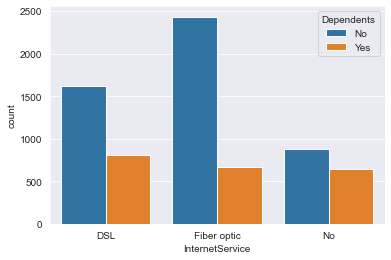

In [25]:
sns.countplot(telco.InternetService, hue=telco.Dependents)

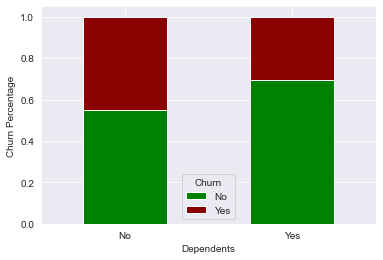

In [26]:
stacked_plot(telco[telco.InternetService == "Fiber optic"], "Dependents", "Churn")

Mostly people without dependents go for fiber optic option as Internnet Service and their churning percentage is high.

<AxesSubplot:xlabel='InternetService', ylabel='count'>

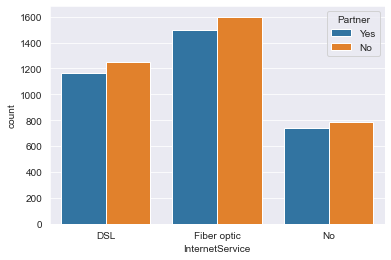

In [27]:
sns.countplot(telco.InternetService, hue = telco.Partner)

<AxesSubplot:xlabel='InternetService', ylabel='count'>

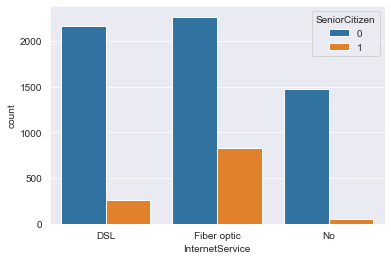

In [28]:
sns.countplot(telco.InternetService, hue = telco.SeniorCitizen)

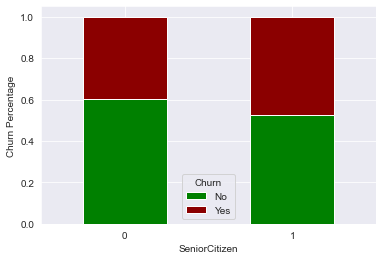

In [29]:
stacked_plot(telco[telco.InternetService == "Fiber optic"], "SeniorCitizen", "Churn")

As we can see, Partner and Senior Citizen do not tell us anything about why fiber optics have higher churning rate.

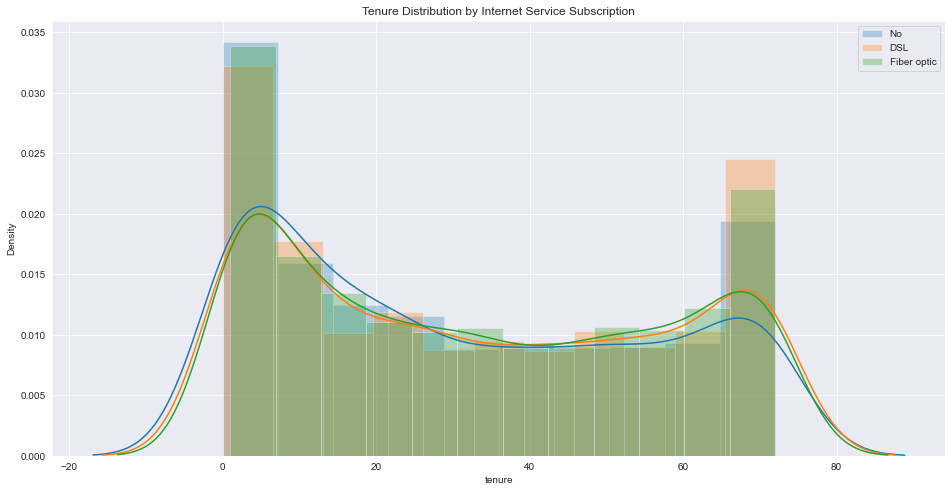

In [30]:
plt.figure(figsize=(16,8))
sns.distplot(telco.tenure[telco.InternetService == "No"], hist_kws=dict(alpha=0.3), label="No")
sns.distplot(telco.tenure[telco.InternetService == "DSL"], hist_kws=dict(alpha=0.3), label="DSL")
sns.distplot(telco.tenure[telco.InternetService == "Fiber optic"], hist_kws=dict(alpha=0.3), label="Fiber optic")
plt.title("Tenure Distribution by Internet Service Subscription")
plt.legend()
plt.show()

Also, the tenure distribution of customers with different internet service is similar.

### Internet Service and related features

In [31]:
telco[telco.InternetService == 'No'].head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
11,Male,0,No,No,16,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),18.95,326.8,No,2
16,Female,0,No,No,52,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,1022.95,No,5
21,Male,0,Yes,No,12,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),19.80,202.25,No,1
22,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes,1
33,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.20,20.2,No,1


In [32]:
telco[telco.InternetService == 'No'].OnlineSecurity.value_counts()

No internet service    1526
Name: OnlineSecurity, dtype: int64

In [33]:
telco[telco.InternetService == 'No'].OnlineBackup.value_counts()

No internet service    1526
Name: OnlineBackup, dtype: int64

In [34]:
telco[telco.InternetService == 'No'].DeviceProtection.value_counts()

No internet service    1526
Name: DeviceProtection, dtype: int64

In [35]:
telco[telco.InternetService == 'No'].TechSupport.value_counts()

No internet service    1526
Name: TechSupport, dtype: int64

In [36]:
telco[telco.InternetService == 'No'].StreamingMovies.value_counts()

No internet service    1526
Name: StreamingMovies, dtype: int64

In [37]:
telco[telco.InternetService == 'No'].StreamingTV.value_counts()

No internet service    1526
Name: StreamingTV, dtype: int64

We need to encode these variables to remove dependancy in the model.

### Contract

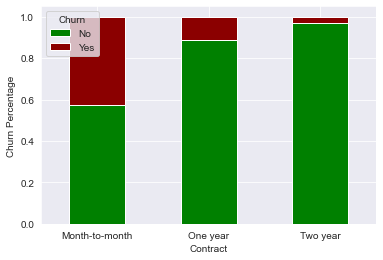

In [38]:
stacked_plot(telco, "Contract", "Churn")

In the case of Month-to-month contract churn rate is very high. There is also a posibility of having customers in the dataframe who are still in their two-year or one-year contract plan.

<AxesSubplot:xlabel='InternetService', ylabel='count'>

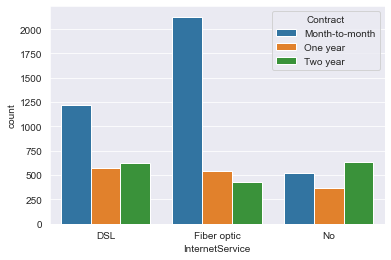

In [39]:
sns.countplot(telco.InternetService, hue = telco.Contract)

Many of the people who choose Fiber optic as Internet service opt for month-to-month Contract and this is the reason for higher churn rate for fiber optic Internet service type.

### Payment Method

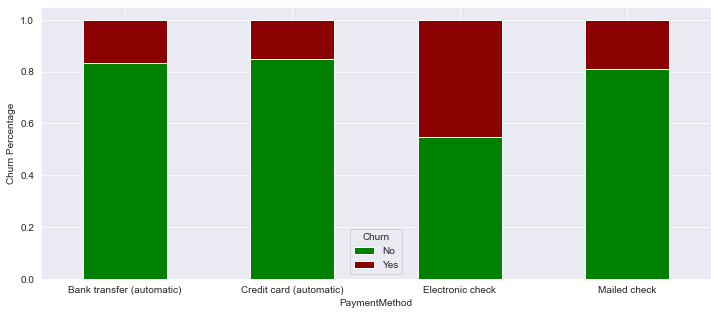

In [40]:
group = "PaymentMethod"
target = "Churn"
fig, ax = plt.subplots(figsize = (12,5))
temp = (telco.groupby([group, target]).size()/telco.groupby(group)[target].count()).reset_index().pivot(columns=target, index=group, values=0)
temp.plot(kind='bar', stacked=True, ax = ax, color = ["green", "darkred"])
ax.xaxis.set_tick_params(rotation=0)
ax.set_xlabel(group)
ax.set_ylabel('Churn Percentage');

Churn rate for electronic check is quite higher than other payment methods.

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

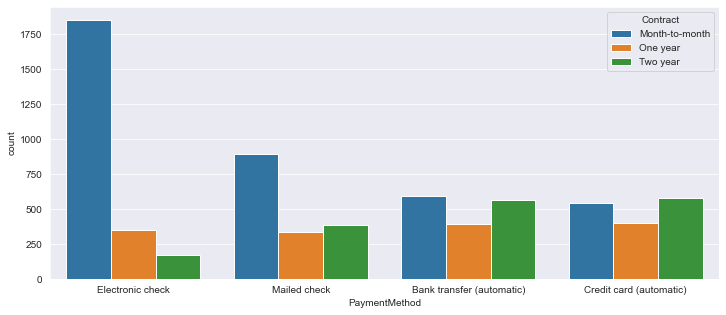

In [41]:
plt.figure(figsize = (12,5))
sns.countplot(telco.PaymentMethod, hue=telco.Contract)

Again we see an impact of month-to-month leading to higher churn.

### Paperless Billing

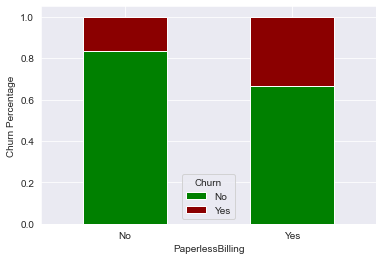

In [42]:
stacked_plot(telco, "PaperlessBilling", "Churn")

### Total Charges

In [43]:
telco.TotalCharges.describe()

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

In [44]:
telco['TotalCharges'] = telco["TotalCharges"].replace(" ",np.nan)
telco['TotalCharges'].isna().sum()

11

In [45]:
telco[telco["TotalCharges"].isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,...,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No,1
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No,1
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,...,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No,1
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No,1
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,...,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No,1
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No,1
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No,1
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No,1
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No,1
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,...,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No,1


All the customers having tenure = 0 have null total charges which means that these customers recently joined and we can fill those missing values as 0.

In [46]:
telco.loc[telco["TotalCharges"].isnull(), 'TotalCharges'] = 0
telco.isnull().any().any()

False

In [47]:
telco['TotalCharges'] = telco["TotalCharges"].astype(float)

Churn = telco[telco.Churn=="Yes"]
Not_Churn = telco[telco.Churn=="No"]

Text(0.5, 0, 'Total Charges')

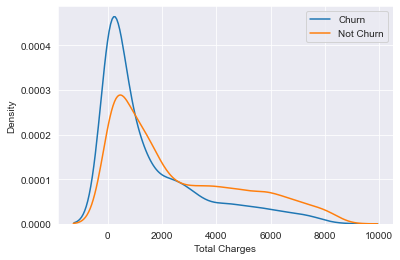

In [48]:
fig, ax = plt.subplots()
sns.kdeplot(Churn["TotalCharges"], label = "Churn", ax= ax)
sns.kdeplot(Not_Churn["TotalCharges"], label = "Not Churn", ax=ax)
plt.legend()
ax.set_xlabel("Total Charges")

The density of total charges for churning customers are high around 0. As many customers cancel the subscription in 1-2 months.

### Monthly Charges

In [49]:
telco.MonthlyCharges.describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

In [50]:
telco.MonthlyCharges.isna().sum()

0

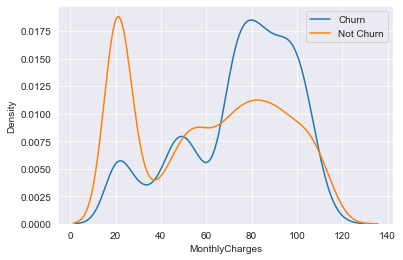

In [51]:
sns.kdeplot(Churn["MonthlyCharges"], label = "Churn")
sns.kdeplot(Not_Churn["MonthlyCharges"], label = "Not Churn")
plt.legend()

The customers paying high monthly fees churn more.

Let's see the correlation of total charges and (monthly charges x tenure) to check if we have redundant information.

In [52]:
np.corrcoef(telco.TotalCharges, telco.MonthlyCharges*telco.tenure)

array([[1.        , 0.99956055],
       [0.99956055, 1.        ]])

### Function to prepare data for model building based on EDA

In [53]:
def datapreparation(filepath):
    
    df = pd.read_csv(filepath)
    df.drop(["customerID"], inplace = True, axis = 1)
    
    df.TotalCharges = df.TotalCharges.replace(" ",np.nan)
    df.TotalCharges.fillna(0, inplace = True)
    df.TotalCharges = df.TotalCharges.astype(float)
    
    cols1 = ['Partner', 'Dependents', 'PaperlessBilling', 'Churn', 'PhoneService']
    for col in cols1:
        df[col] = df[col].apply(lambda x: 0 if x == "No" else 1)
   
    df.gender = df.gender.apply(lambda x: 0 if x == "Male" else 1)
    df.MultipleLines = df.MultipleLines.map({'No phone service': 0, 'No': 0, 'Yes': 1})
    
    cols2 = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
    for col in cols2:
        df[col] = df[col].map({'No internet service': 0, 'No': 0, 'Yes': 1})
    
    df = pd.get_dummies(df, columns=['InternetService', 'Contract', 'PaymentMethod'], drop_first=True)
    
    return df